In [1]:
import warnings
warnings.filterwarnings("ignore")

# Basics - Data Handling
import numpy as np
import pandas as pd

# Visualization
import missingno
import seaborn as sns
import matplotlib.pyplot as plt

# Miscellaneous
from collections import Counter

# Data Imputation, Data Sampling
from missingpy import MissForest
from imblearn.over_sampling import SMOTE

# sklearn Classification and Model Building
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Scoring functions
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

 ## Load imputed data

In [2]:
X_train = pd.read_csv("datasets/train_final.csv", index_col=0)
Y_train = X_train["y"]
X_train.drop(["y"], axis=1, inplace=True)
display(X_train.head(2))

X_test = pd.read_csv("datasets/test_final.csv", index_col=0)
display(X_test.head(2))

,Income,Age,Score1,Score3,Score4,Score5,Loan type_1.0,Occupation type_1.0,Occupation type_2.0
0,14767.28013,1.0,0.016885,22.521523,600.911200,3464.613291,1,1,0
1,15272.26775,0.0,0.240375,5.349117,600.888816,3374.921455,1,1,0


,Income,Age,Score1,Score3,Score4,Score5,Loan type_1.0,Occupation type_1.0,Occupation type_2.0
0,16691.51975,1.0,0.348808,12.506668,607.396052,3440.172169,1,0,0
1,14782.20015,0.0,0.426270,12.976712,599.808710,3517.084962,0,0,1


## SMOTE Synthetic Data Generation

In [3]:
# Setting up testing and training sets
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

print("Before SMOTE:", Counter(y_train))
sm = SMOTE(random_state=42, sampling_strategy=1.0)
x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train)
print("After SMOTE:", Counter(y_train_sm))

Before SMOTE: Counter({0.0: 56075, 1.0: 3925})
After SMOTE: Counter({0.0: 56075, 1.0: 56075})


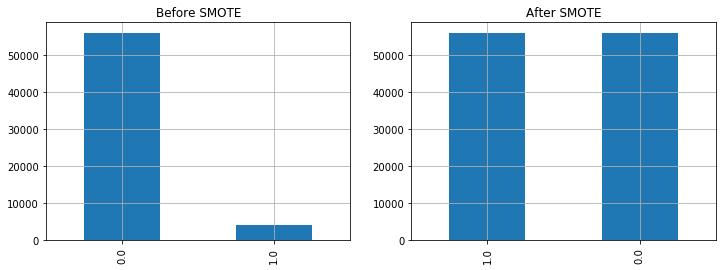

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[12,4])
y_train.value_counts().plot.bar(grid=True, ax=axes[0], title="Before SMOTE")
y_train_sm.value_counts().plot.bar(grid=True, ax=axes[1], title="After SMOTE")
plt.show()

## Saving the SMOTE train data and Validation split

In [5]:
x_train_sm["y"] = y_train_sm
x_train_sm.to_csv("datasets/train_smote.csv")
x_train_sm.drop(["y"], axis=1, inplace=True)

x_val["y"] = y_val
x_val.to_csv("datasets/validation.csv")
x_val.drop(["y"], axis=1, inplace=True)